- Data Preprocessing
- Comparing means
- T tests
- Analysis of variance
- Nonparametric statistical tests


# **Part 1: Preparing data for Statistcal Analysis**

Original Source: https://github.com/divya-gh/Spotify_Music_Analysis

Data is taken from [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) which has been authored by Yamac Eren Ay and  was collected using Spotify Web API.


In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load Data


In [2]:
file_path = "Resources/data.csv"
spotify_data_df = pd.read_csv(file_path)

## Display DataFrame



In [3]:
spotify_data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


## Display total music releases by artists over 100 years

In [4]:
rows = spotify_data_df.shape[0]
columns = spotify_data_df.shape[1]
total_before = pd.DataFrame({
                     " Total Rows": [rows],
                     " Total Columns": [columns]
                    })
total_before

,Total Rows,Total Columns
0,174389,19


The dataset contains a total of 1,74,389 records by artists till date and has 19 audio characteristics.

## Understand and Explore Audio Characteristics

Get a sense of data you collected, such as artisits, song names, popularity, etc and their types.


In [5]:
spotify_data_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [6]:
spotify_data_df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

## Feature Description: Explain how they are measured and what they mean.
### Primary:
    •	- id : Song unique ID

### Numerical:
    •	- acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic; 1-High , 0 -Low
    •	- danceability: How suitable a track is for dancing based on a combination of musical elements; 0-Least, 1-Most
    •	- energy: Measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy;0-Low,1-High
    •	- duration_ms : Duration of song in milliseconds ranging from 200k to 300k
    •	- instrumentalness :Predicts whether a track contains no vocals(ex: oohh and aahh) ;1-No vocals, 0-vocal
    •	- valence : Musical positiveness conveyed by a track.
            0-negative(sad, depressed, angry) ,
            1-positive (happy, cheerful, euphoric)
    •	- popularity: Based on number of plays and downloads ; 0-Less Popular, 100-Very Popular
    •	- tempo : Overall estimated tempo of a track in beats per minutes(BPM);50-Low , 100-High
    •	- liveness: Detects the presence of an audience in the recording ; 0-No , 1 -Yes
    •	- loudness: Overall relative loudness of tracks in decibels (dB). -60 low ,0-High
    •	- speechiness: presence of spoken words in a track.
              Values >0.66-entirely of spoken words.
              Values between 0.33 and 0.66 describe tracks that may contain both music and speech,like rap music.
              Values < 0.33 mostly music and other non-speech-like tracks.
    •	- year : The year music was recorded and release (1921 to 2020)

### Dummy:
    •	- mode (0 = Minor, 1 = Major)
    •	- explicit (0 = No explicit content, 1 = Explicit content)

### Categorical:
    •	- key : All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1
    •	- artists :Song Artist
    •	- release_date : Date when album released
    •	- name : Song Name


###  Interesting insights from data exploration:
    -	This data is simply a sample of tracks released in those 100 years and not a complete set.
    -	According to Spotify developers site, the popularity is calculated by an algorithm and is based on the
         total number of downloads and plays the track has had and how recent those plays are. While this is accurate for
         newer tracks, could be a bias on older tracks.
    -   Valance descibes the mood of the singer. It would be interesting to know that it was measured based on
         loudness. Louder the song, happier and cheerful it is.
    -   Not all the features are measured in the range 0-1 . ex: To plot the trending of loudness with other features
         over time, we would have to normalize the units to fit the scale.

## Preprocessing and Feature Selection

- Perform basic data cleanup.
- Select features that fit to the stats analysis interests.[link text](https://)
- Here we keep them all.

In [7]:
spotify_data_df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Data needs a cleanup:
- Remove special charecters from the artists column.
- Parse data types and
- Drop Null values.

In [8]:
# remove special characters from the column 'artist' using lstrip , rstrip  and str.replace functions (aka "[]")
spotify_data_df_clean_artists= spotify_data_df.copy()
spotify_data_df_clean_artists["artists"]=spotify_data_df_clean_artists["artists"].map(lambda x: x.lstrip("['").rstrip("']")).astype(str)


In [9]:
spotify_data_df_clean_artists.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"""Screamin' Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [10]:
# remove single and double quotes
spotify_data_df_clean_artists["artists"]=spotify_data_df_clean_artists["artists"].str.replace("'","").str.replace('"',"")

In [11]:
spotify_data_df_clean_artists

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"DJ Combo, Sander-7, Tony T",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [12]:
# drop Null values in the df if any
spotify_data_df_clean =spotify_data_df_clean_artists.dropna(how='any')
spotify_data_df_clean.shape[0]

174389

**Note** : None of the rows were dropped so dataframe has no Null values

All the features in interest have expected dtypes hence, no columns need any datatype conversion.

# **Part 2: Descriptive Statis -  Initial Analysis after Cleanup**

In [13]:
spotify_data_df_clean.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


### Basic statistical analysis
                       
- No. of releases :1,74,389
- Start year : 1920             
- End Year : 2021   
             
#### Note :  From the table , we can see that there are records with loudness greater than zero. According to spotify developers site, range is between -60 to 0 db .This could be an error so we need to remove these records.

In [14]:
spotify_data_df_clean = spotify_data_df_clean[spotify_data_df_clean["loudness"]<0]
loudness_after = pd.DataFrame({
                        "max_loudness":[spotify_data_df_clean["loudness"].max()],
                        "min_loudness":[spotify_data_df_clean["loudness"].min()]
                        })
loudness_after

,max_loudness,min_loudness
0,-0.007,-60.0


In [15]:
spotify_data_df_clean.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920
1,0.643,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920
2,0.993,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920


In [16]:
ideal_order = ['id','name','year', 'artists', 'duration_ms',  'release_date',
               'energy', 'acousticness', 'danceability',
               'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
               'mode', 'popularity', 'speechiness', 'tempo',
               'valence' ]
spotify_df = spotify_data_df_clean[ideal_order]

In [17]:
spotify_df.head(5)

,id,name,year,artists,duration_ms,release_date,energy,acousticness,danceability,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,1920,Mamie Smith,168333,1920,0.224,0.991000,0.598,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340
1,0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920,Screamin Jay Hawkins,150200,1920-01-05,0.517,0.643000,0.852,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500
2,11m7laMUgmOKqI3oYzuhne,Golfing Papa,1920,Mamie Smith,163827,1920,0.186,0.993000,0.647,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890
3,19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920,Oscar Velazquez,422087,1920-01-01,0.798,0.000173,0.730,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422
4,2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920,Mixe,165224,1920-10-01,0.707,0.295000,0.704,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990


In [18]:
rows = spotify_df.shape[0]
columns = spotify_df.shape[1]
total_after = pd.DataFrame({
                     " Total Rows": [rows],
                     " Total Columns": [columns]
                    })
total_after

,Total Rows,Total Columns
0,174354,19


## Save Clean Data for Further Analysis

In [20]:
out_path = "spotify_clean.csv"
spotify_df.to_csv(out_path , index=False , encoding="utf-8")

# **Part 3: T tests**

## Independent Samples t-test


### Example:

Compare two *independent* groups: explicit=0 vs explicit=1.

### Hypothesis:

- H0: Explicit and non-explicit songs have the same mean energy.
- H1: There is a significant difference in energy between explicit and non-explicit songs.


## Check Normal Distribution

- choices of measures: parametric / non-parametric.

> # **Pass this on to Charles to deal with it.**


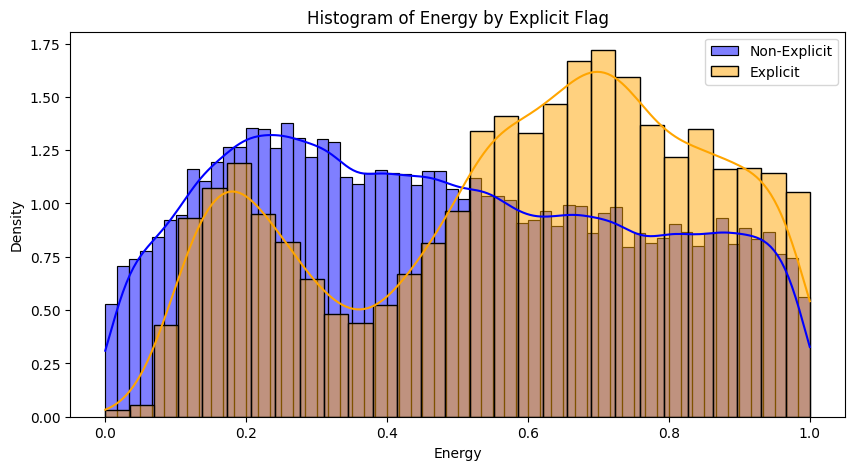

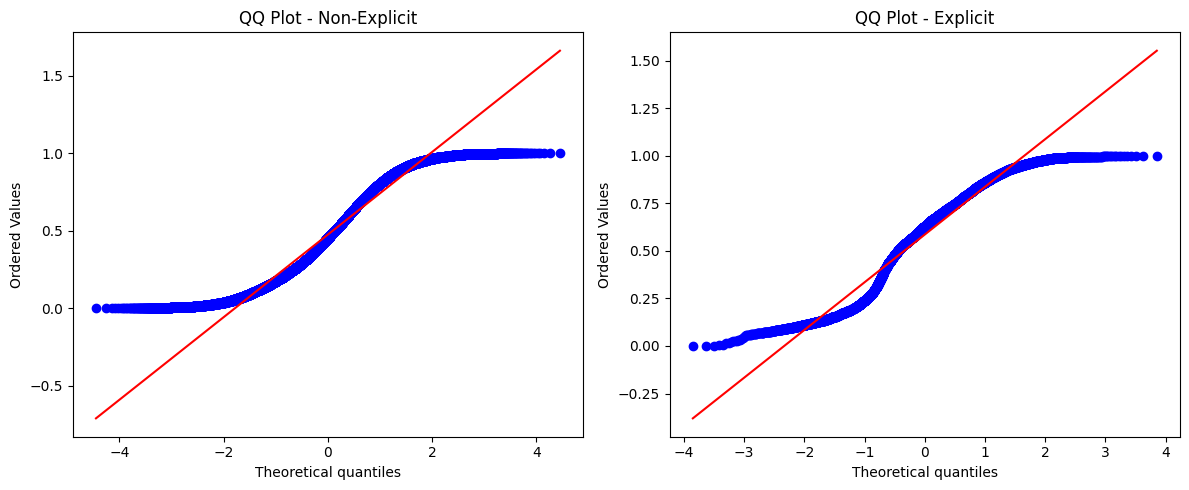

In [19]:
import seaborn as sns
import scipy.stats as stats

# group the data
group1 = spotify_df[spotify_df['explicit'] == 0]['energy']
group2 = spotify_df[spotify_df['explicit'] == 1]['energy']

# === 1. Histogram with KDE ===
plt.figure(figsize=(10, 5))
sns.histplot(group1, kde=True, color='blue', label='Non-Explicit', stat='density')
sns.histplot(group2, kde=True, color='orange', label='Explicit', stat='density')
plt.title('Histogram of Energy by Explicit Flag')
plt.xlabel('Energy')
plt.ylabel('Density')
plt.legend()
plt.show()

# === 2. QQ Plots ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# QQ Plot for Non-Explicit
stats.probplot(group1, dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot - Non-Explicit")

# QQ Plot for Explicit
stats.probplot(group2, dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot - Explicit")

plt.tight_layout()
plt.show()


In [ ]:
# import t-test library
from scipy.stats import ttest_ind

group1 = spotify_df[spotify_df['explicit'] == 0]['energy']
group2 = spotify_df[spotify_df['explicit'] == 1]['energy']

print(f"Explicit=0: {len(group1)}, Explicit=1: {len(group2)}")

# check mean difference
mean_explicit = group2.mean()
mean_non_explicit = group1.mean()

print(f"Mean energy (explicit): {mean_explicit:.4f}")
print(f"Mean energy (non-explicit): {mean_non_explicit:.4f}")
print(f"Difference: {mean_explicit - mean_non_explicit:.4f}")

# equal_var -- unequal variance
# setting equal_var to False uses Welch's t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


Explicit=0: 162479, Explicit=1: 11875
Mean energy (explicit): 0.5860
Mean energy (non-explicit): 0.4751
Difference: 0.1109
T-statistic: -45.1060, P-value: 0.0000


### Plot Mean Difference

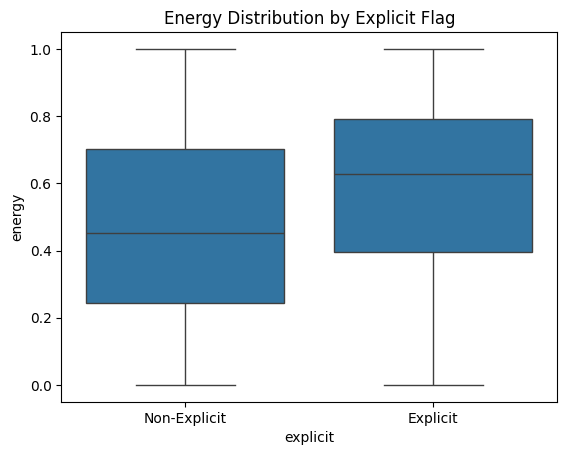

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='explicit', y='energy', data=spotify_df)
plt.title('Energy Distribution by Explicit Flag')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()


### Degree of Freedom

Since groups are very different in size and may have different variances, we use Welch’s t-test, which adjusts the degrees of freedom with the Welch–Satterthwaite formula. This gives a more accurate p-value when assumptions of equal variance are violated.


In [29]:
import numpy as np

# Get sample sizes
n1, n2 = len(group1), len(group2)

# Get sample variances
s1_sq = np.var(group1, ddof=1)
s2_sq = np.var(group2, ddof=1)

# Welch–Satterthwaite equation
numerator = (s1_sq/n1 + s2_sq/n2)**2
denominator = ((s1_sq/n1)**2)/(n1 - 1) + ((s2_sq/n2)**2)/(n2 - 1)
df_welch = numerator / denominator

print(f"Welch's degrees of freedom: {df_welch:.2f}")

Welch's degrees of freedom: 13884.80


#### T-tests Interpretation

- There is a statistically significant difference in energy between explicit and non-explicit songs.
- The negative t-statistic suggests that explicit songs have higher energy (if you did explicit=1 minus explicit=0).
- We reject the null hypothesis (p < 0.05).

**Note** Welch’s t-test was correctly used because of unequal group sizes and unknown variances.

## Paired Samples t-test

### Example: paired features from the same observation on songs.


### Hypothesis:
- H0: The danceability of a song and its valence are equal on average.
- H1: The average danceability and valence differ within the same song.


In [30]:
# import paired-samples t-test
from scipy.stats import ttest_rel

# check mean difference
mean_dance = spotify_df['danceability'].mean()
mean_valence = spotify_df['valence'].mean()

print(f"Mean Danceability: {mean_dance:.4f}")
print(f"Mean Valence: {mean_valence:.4f}")
print(f"Mean Difference: {mean_dance - mean_valence:.4f}")

t_stat, p_value = ttest_rel(spotify_df['danceability'], spotify_df['valence'])

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


Mean Danceability: 0.5368
Mean Valence: 0.5245
Mean Difference: 0.0122
T-statistic: 22.6158, P-value: 0.0000


### Plot Mean Difference



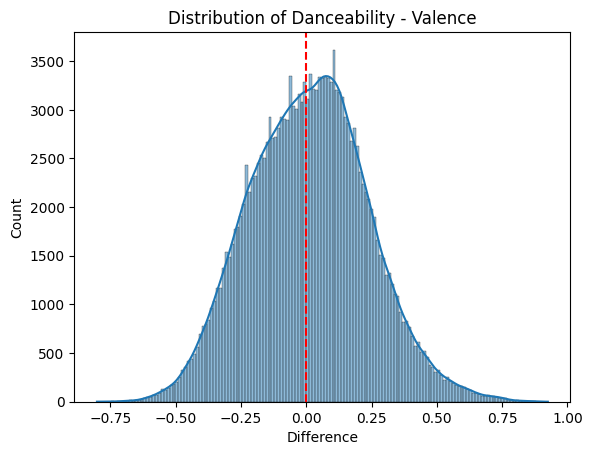

In [32]:

# distribution of differences
diff = spotify_df['danceability'] - spotify_df['valence']

sns.histplot(diff, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Danceability - Valence')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.show()


#### Paired-samples t-test Interpretation

- We reject the null hypothesis: The average danceability and valence scores of songs are not equal.
- Since the t-statistic is positive, it suggests: Danceability is significantly greater than valence, on average.



## One-tailed t-test

### Hypothesis (One-tailed):
- H0: Popularity of songs from year <= 2010 is greater than or equal to popularity of songs from year > 2010.
- H1: Songs from after 2010 are more popular.

In [33]:
pre_2010 = spotify_df[spotify_df['year'] <= 2010]['popularity']
post_2010 = spotify_df[spotify_df['year'] > 2010]['popularity']

t_stat, p_value = ttest_ind(post_2010, pre_2010, equal_var=False)

# one-tailed: divide p-value by 2 and check direction
if t_stat > 0:
    p_one_tailed = p_value / 2
else:
    p_one_tailed = 1 - (p_value / 2)

print(f"One-tailed p-value: {p_one_tailed:.4f}")


One-tailed p-value: 0.0000


### Plot Difference

/var/folders/2z/c8nx_d8n7mlfq33dzjwb3qh00000gn/T/ipykernel_90357/836487975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['era'] = spotify_df['year'].apply(lambda x: 'Pre-2010' if x <= 2010 else 'Post-2010')


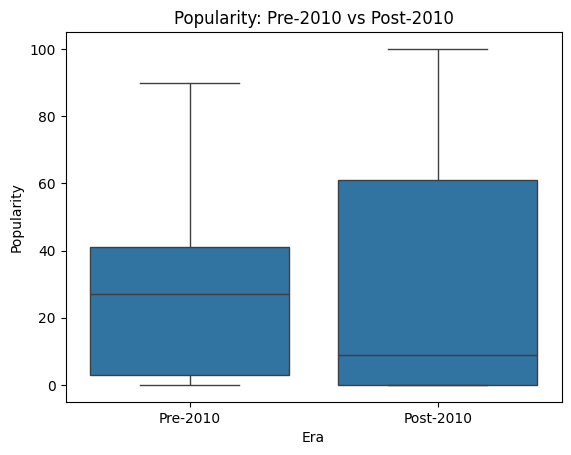

In [26]:
spotify_df['era'] = spotify_df['year'].apply(lambda x: 'Pre-2010' if x <= 2010 else 'Post-2010')

sns.boxplot(x='era', y='popularity', data=spotify_df)
plt.title('Popularity: Pre-2010 vs Post-2010')
plt.xlabel('Era')
plt.ylabel('Popularity')
plt.show()

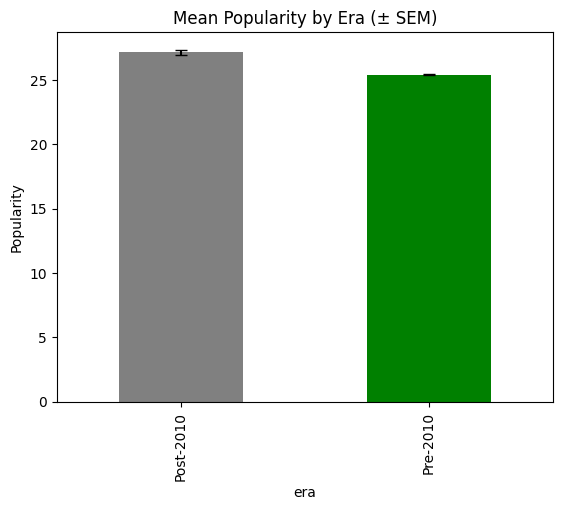

In [27]:
means = spotify_df.groupby('era')['popularity'].mean()
stds = spotify_df.groupby('era')['popularity'].std()
counts = spotify_df.groupby('era')['popularity'].count()
sems = stds / np.sqrt(counts)  # standard error of mean

means.plot(kind='bar', yerr=sems, capsize=4, color=['gray', 'green'])
plt.title('Mean Popularity by Era (± SEM)')
plt.ylabel('Popularity')
plt.show()

### Interpretation

A one-tailed t-test is appropriate when the hypothesis has a direction — whether post-2010 songs are more popular than pre-2010.

The extremely low p-value shows the result is significant, and the plots show a clear shift in popularity.

# **Part 4: ANOVA**


### Example: Testing 3 or more groups.

### Hypothesis:
- H0: The mean tempo is the same across all keys (0–11).
- H1: At least one key group has a significantly different mean tempo.


In [36]:
from scipy.stats import f_oneway

# group by 'key' (12 groups)
groups = [group['tempo'].values for _, group in spotify_df.groupby('key')]

f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")


F-statistic: 33.1774, P-value: 0.0000


#### Interpretation

p < 0.001

There is a statistically significant difference in the mean value of the dependent variable across at least one of the groups in the independent variable.

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# treat the variable key as a categorical factor (not numeric) -- variation between groups.
model = ols('tempo ~ C(key)', data=spotify_df).fit()

# Get full ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']
anova_table['eta_sq'] = anova_table['sum_sq'] / anova_table['sum_sq'].sum()

print(anova_table)

                sum_sq        df          F        PR(>F)       mean_sq  \
C(key)    3.332958e+05      11.0  33.177446  1.985443e-71  30299.614250   
Residual  1.592195e+08  174342.0        NaN           NaN    913.259395   

            eta_sq  
C(key)    0.002089  
Residual  0.997911  



> The F-value of 33.18 tells us the between-group variance (due to key) is much greater than the within-group variance (error). The p-value < 0.001 confirms this is statistically significant. But notice the eta squared: key explains ~2.5% of the total variance in tempo — so it's significant, but not the main factor.



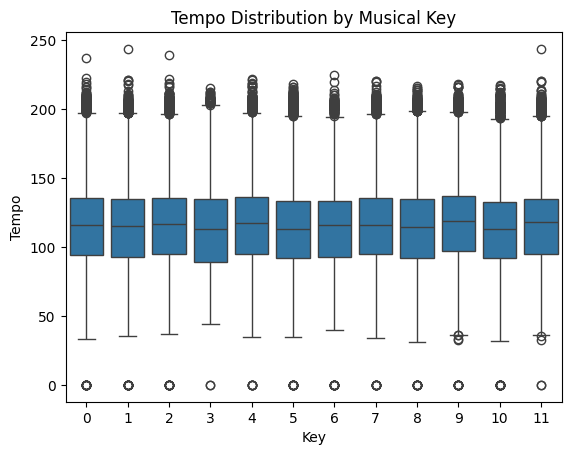

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='key', y='tempo', data=spotify_df)
plt.title('Tempo Distribution by Musical Key')
# charles if you want you can chage the labels.
plt.xlabel('Key')
plt.ylabel('Tempo')
plt.show()

## Factorial ANOVA (Two way)


> Does a song’s tempo vary depending on both its musical key and mode (major/minor)?

Key = 12 levels (categorical)
Mode = 0 (minor), 1 (major)

- Test main effects of key and mode
- Test interaction effect between key × mode

In [39]:
# model: tempo ~ key + mode + key:mode
model = ols('tempo ~ C(key) + C(mode) + C(key):C(mode)', data=spotify_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# add mean square and effect size
anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']
anova_table['eta_sq'] = anova_table['sum_sq'] / anova_table['sum_sq'].sum()

print(anova_table)


                      sum_sq        df          F        PR(>F)       mean_sq  \
C(key)          3.347801e+05      11.0  33.365121  7.268704e-72  30434.556453   
C(mode)         2.446628e+03       1.0   2.682216  1.014763e-01   2446.628028   
C(key):C(mode)  1.989812e+05      11.0  19.831027  1.340914e-40  18089.204512   
Residual        1.590180e+08  174330.0        NaN           NaN    912.166819   

                  eta_sq  
C(key)          0.002098  
C(mode)         0.000015  
C(key):C(mode)  0.001247  
Residual        0.996639  


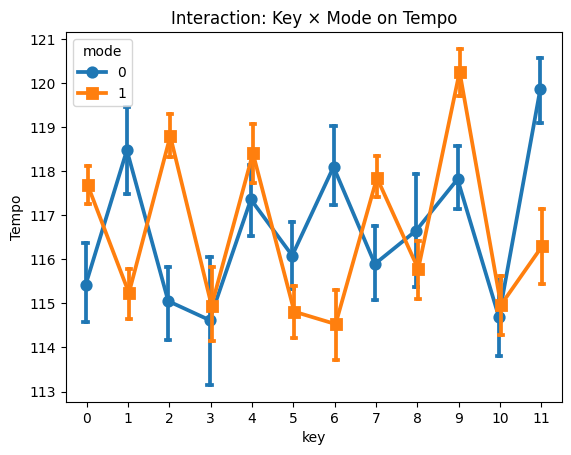

In [40]:

sns.pointplot(x='key', y='tempo', hue='mode', data=spotify_df, dodge=True, markers=['o', 's'], capsize=0.1)
plt.title("Interaction: Key × Mode on Tempo")
plt.ylabel("Tempo")
plt.show()


## Repeated Measures ANOVA

### Example:
> Within each song, are there significant differences between the following audio features?

- danceability
- energy
- valence

This is a within-subject design because each song has all 3 measures.

In [33]:
df_long = spotify_df[['id', 'danceability', 'energy', 'valence']].melt(id_vars='id',
                                                               value_vars=['danceability', 'energy', 'valence'],
                                                               var_name='feature',
                                                               value_name='score')


In [34]:
df_long_clean = (
    df_long
    .groupby(['id', 'feature'], as_index=False)['score']
    .mean()
)



> **ARG. this is bad and complicated.**

Can I just leave to Charles to figure it out by himself?



In [35]:
# from statsmodels.stats.anova import AnovaRM

# anova_rm = AnovaRM(df_long_clean, depvar='score', subject='id', within=['feature'])
# results = anova_rm.fit()

# print(results)

# **Part 5: Nonparametric statistcal tests**

Test whether there is any relationship in categorical variables.

## Chi-Square Test of Independence

### Hypothesis:

> Is there a relationship between explicit content and mode (major/minor)?

- explicit = 0 or 1
- mode = 0 (minor) or 1 (major)

This data is usually presented in tables of counts.

In [41]:
from scipy.stats import chi2_contingency

# let's make them to a 2*2 table
contingency_table = pd.crosstab(spotify_df['explicit'], spotify_df['mode'])

print(contingency_table)

mode          0       1
explicit               
0         47098  115381
1          4791    7084


In [42]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 682.4074
Degrees of freedom: 1
P-value: 0.0000


#### Interpretation

-  Since p < 0.05, we reject the null hypothesis which explicit content and musical mode are not independent. 
- There is a significant relationship between them.